# Assignment 7

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

In [1]:
import os
if os.getcwd().split('/')[-1] != 'data':
    os.chdir('../data')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### - Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.

In [5]:
metabric = pd.read_csv('metabric.csv')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


<Axes: xlabel='Overall Survival (Months)', ylabel='Density'>

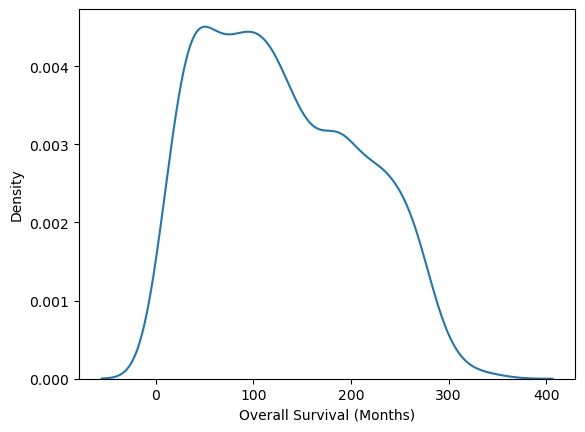

In [6]:
sns.kdeplot(data=metabric, x='Overall Survival (Months)')

### - Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
###  - Derive the density for this distribution.

## Gemini's Derivation of the Exponential Density Function

The cumulative distribution function (CDF) for an exponentially distributed random variable $T$ with parameter $\lambda$ is:
$$
F(t) = P[T \le t] = 1 - e^{-\lambda t}, \quad \text{for } t \ge 0
$$

The probability density function (PDF), $f(t)$, is the derivative of the CDF:
$$
f(t) = \frac{d}{dt} F(t)
$$

Substituting the CDF into the derivative:
$$
f(t) = \frac{d}{dt} (1 - e^{-\lambda t})
$$

Using the linearity of the derivative and applying the chain rule to the exponential term:
$$
f(t) = \frac{d}{dt} (1) - \frac{d}{dt} (e^{-\lambda t})
$$
$$
f(t) = 0 - \left( \frac{d}{dt} (-\lambda t) \right) e^{-\lambda t}
$$
$$
f(t) = - (-\lambda) e^{-\lambda t}
$$
$$
f(t) = \lambda e^{-\lambda t}
$$

### Final Probability Density Function (PDF)

Considering the support of the distribution ($t \ge 0$), the **density function** is:
$$
f(t) = \begin{cases} \lambda e^{-\lambda t}, & \text{for } t \ge 0 \\ 0, & \text{for } t < 0 \end{cases}
$$

### - Write out the likelihood.

$L(\lambda | t_1) = \lambda e^{-\lambda t_1}$\
$L(\lambda|t_1, t_2,..., t_n) = L(\lambda | t_1)L(\lambda | t_2)...L(\lambda | t_n)$\
$L(\lambda|t_1, t_2,..., t_n) = \lambda e^{-\lambda t_1}\lambda e^{-\lambda t_2}...\lambda e^{-\lambda t_n}$\
$L(\lambda|t_1, t_2,..., t_n) = \lambda^{n}[ e^{-\lambda t_1} e^{-\lambda t_2}...e^{-\lambda t_n}]$\
$L(\lambda|t_1, t_2,..., t_n) = \lambda^{n}[ e^{-\lambda (t_1+t_2+...+t_n)}]$

### - Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?

Take the derivative of our likelihood with respect to $\lambda$\
$\frac{d}{d\lambda}L(\lambda|t_1, t_2,..., t_n) =\frac{d}{d\lambda} \lambda^{n}[ e^{-\lambda (t_1+t_2+...+t_n)}]$\
$...=\frac{d}{d\lambda} log(\lambda^{n}[ e^{-\lambda (t_1+t_2+...+t_n)}])$\
$...=\frac{d}{d\lambda} log(\lambda^{n})+log[e^{-\lambda (t_1+t_2+...+t_n)}]$\
$...=\frac{d}{d\lambda} nlog(\lambda)-\lambda(t_1+t_2+...+t_n)$\
$...=n\frac{1}{\lambda}-(t_1+t_2+...+t_n)$\
Set the derivative equal to 0\
$0=n\frac{1}{\lambda}-(t_1+t_2+...+t_n)$\
$(t_1+t_2+...+t_n)=n\frac{1}{\lambda}$\
$\lambda(t_1+t_2+...+t_n)=n$\
$\lambda=\frac{n}{(t_1+t_2+...+t_n)}$

### - Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.

### - Bootstrap the sampling density/distribution of $\hat{\lambda}$.